In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math

import matplotlib.pyplot as pl
import sympy as sm


# VIDEO: Vectors


In [3]:
row_vec = np.array([4,2])
col_vec = np.array([ [-2], [3] ])



array([4, 2])

In [4]:
sym.sympify(row_vec)

[4, 2]

In [5]:
sym.sympify(col_vec)

[[-2], [3]]

M:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


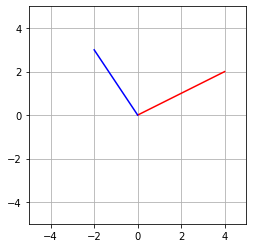

In [6]:
plt.plot([0,row_vec[0]],[0,row_vec[1]],'r',label='row vector')
plt.plot([0,col_vec[0]],[0,col_vec[1]],'b',label='column vector')

plt.axis('square')
plt.axis([-5,5,-5,5])
plt.grid()
plt.show()


# VIDEO: Singular value decomposition


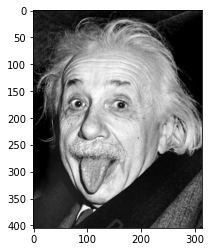

(405, 314, 3)
(405, 314)


In [7]:
# SVD of Einstein
from PIL import Image
ein = Image.open('einstein.jpg')

plt.imshow(ein)
plt.show()

# SVD is defined on 2D matrices
print( np.shape(ein) )
ein = np.mean(ein,2)
print( np.shape(ein) )


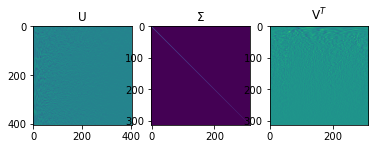

In [8]:
# Take the SVD
U,s,V = np.linalg.svd(ein)

# image the results
fig,ax = plt.subplots(1,3)

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(np.diag(np.log(s)))
ax[1].set_title('$\\Sigma$')

ax[2].imshow(V)
ax[2].set_title('V$^T$')
plt.show()


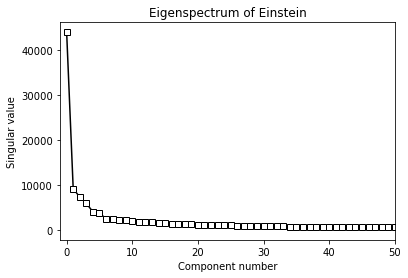

In [9]:
# plot the eigenspectrum

plt.plot(s,'ks-',markerfacecolor='w')
plt.xlim([-1,50])
plt.xlabel('Component number')
plt.ylabel('Singular value')
plt.title('Eigenspectrum of Einstein')
plt.show()


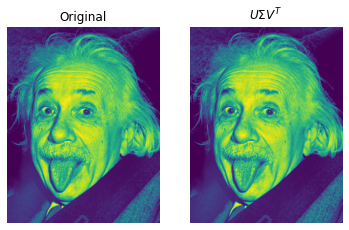

In [10]:
# reconstruct ein, then shuffle the singular values

# reconstruct S from s
S = np.zeros(np.shape(ein))
for i in range(0,len(s)):
    S[i,i] = s[i]

rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('$U\\Sigma V^T$')

plt.show()


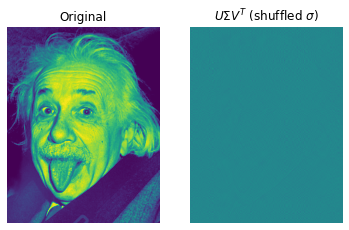

In [11]:
# reconstruct S from s
S = np.zeros(np.shape(ein))

randorder = np.random.permutation(len(s))

for i in range(0,len(s)):
    S[i,i] = s[randorder[i]]

# for i in range(5,len(s)): # 0-10 and 5-end
#     S[i,i] = s[i]
    
    
rein = U@S@V

plt.subplot(1,2,1)
plt.imshow(ein)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(rein)
plt.axis('off')
plt.title('$U\\Sigma V^T$ (shuffled $\\sigma$)')

plt.show()
